# 1.4-Supervised Learning Algorithms Part 1

## 01.Import Libraries

In [48]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

## 02.Import Data

In [51]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\02 Data\Data Sets'

In [53]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [55]:
### Import the pleasant weather data
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [57]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
climate.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)

In [61]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [63]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [65]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [67]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [71]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [73]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

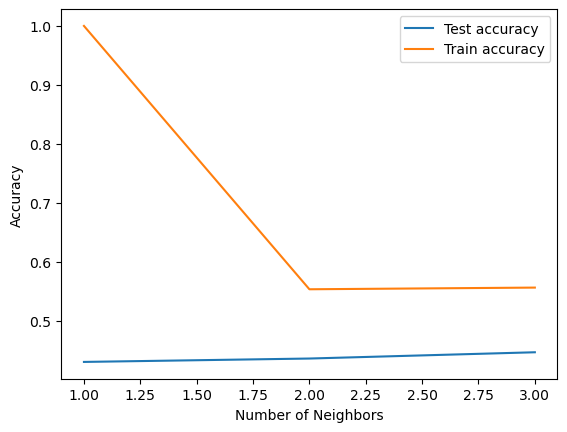

In [74]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

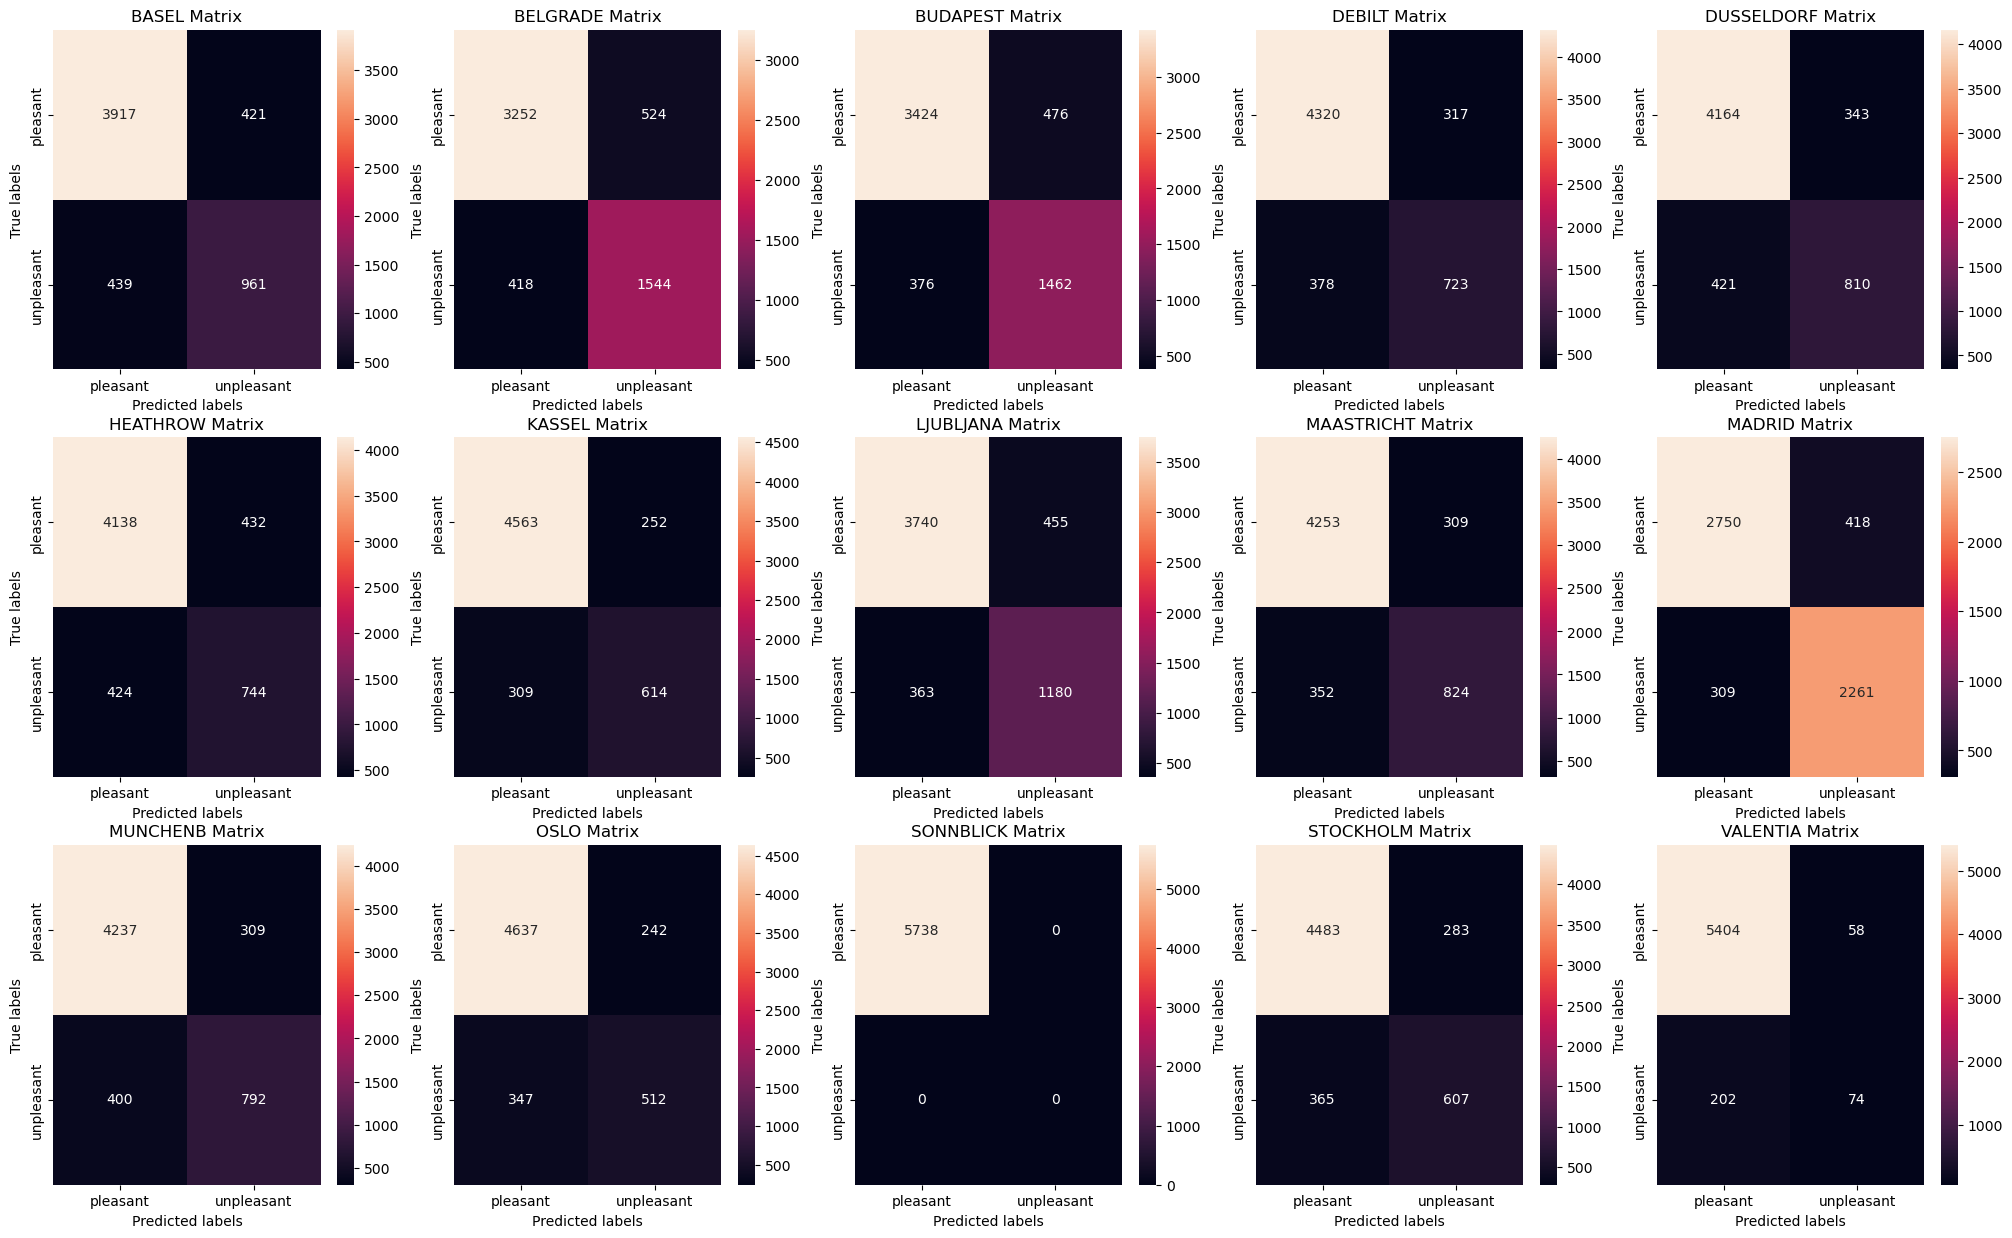

In [80]:
# Confusion matrix based on the last "k" in the sequence (Test data)
# Assuming y_test is a numpy array, we replace .loc with standard indexing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming labels 'pleasant' and 'unpleasant' are coded as 0 and 1
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']
count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]
        
        # Ensure the labels parameter includes all classes to avoid warnings
        cm = confusion_matrix(y_test[:, count], y_pred[:, count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        
        # Labels, title, and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        ax[i, j].xaxis.set_ticklabels(labels)
        ax[i, j].yaxis.set_ticklabels(labels)
        
        count += 1
